Dataset Overview:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Unique Crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']

Dataset Shape: (2200, 8)

Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Number of duplicate rows: 0

Data types of each column:
N                int64
P                int64
K                int64
temperatur

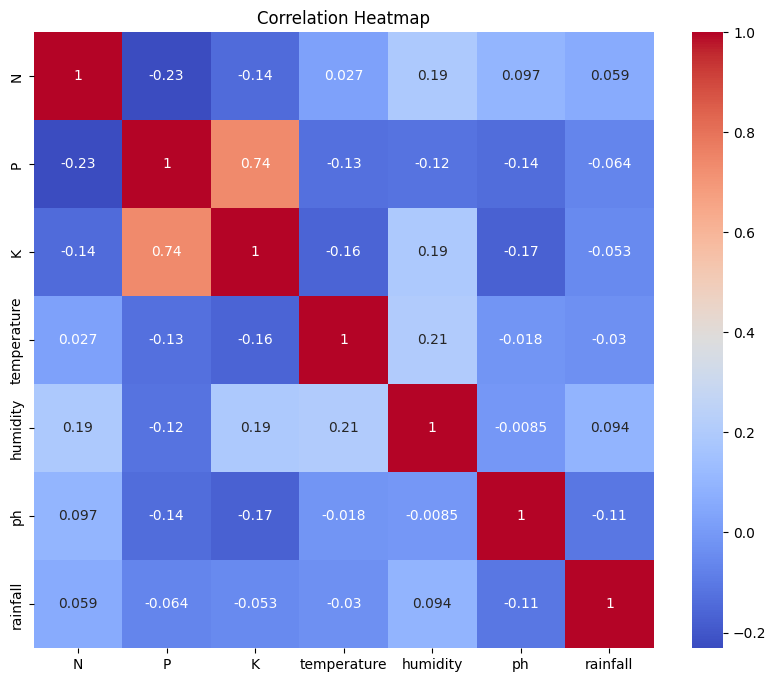

Training set: (1760, 7) (1760,)
Testing set: (440, 7) (440,)

Random Forest Accuracy: 99.31818181818181
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.

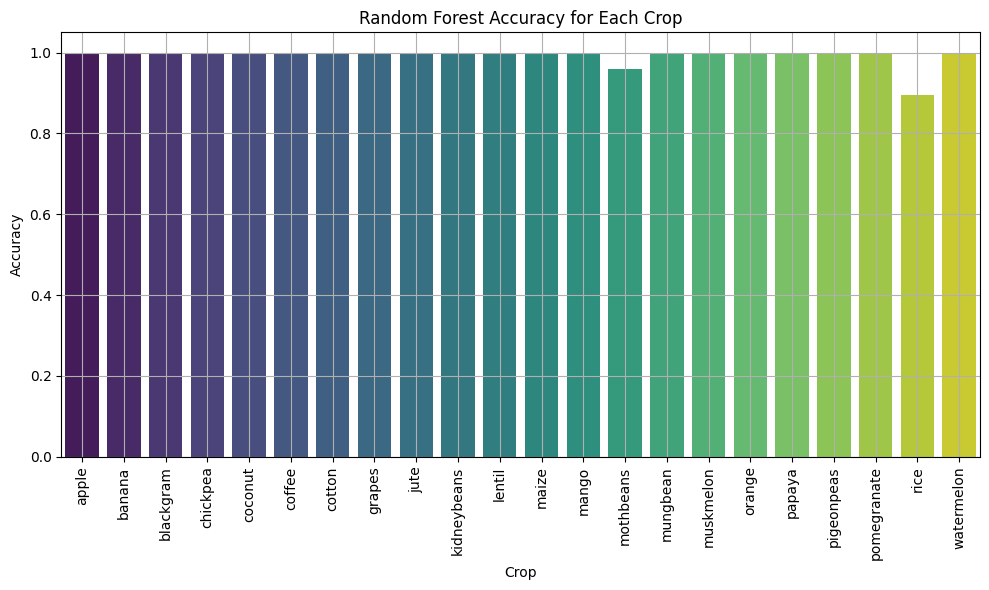

Example 1 - Predicted Crop: coffee
Example 2 - Predicted Crop: jute


In [48]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('Crop_recommendation.csv')

# Data Analysis
print("Dataset Overview:")
print(df.head())
print("\nUnique Crops:", df['label'].unique())
print("\nDataset Shape:", df.shape)

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

# Check for duplicate rows
print('\nNumber of duplicate rows:', df.duplicated().sum())

# Check the data types of each column
print('\nData types of each column:')
print(df.dtypes)

# Correlation heatmap
numeric_df = df.select_dtypes(include='number')  # Select numeric columns only
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Separate features and target
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

# Encode the target variable
le = LabelEncoder()
target_encoded = le.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set:', X_train.shape, y_train.shape)
print('Testing set:', X_test.shape, y_test.shape)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=20, random_state=5)
rf.fit(X_train, y_train)

# Evaluate Random Forest
predicted_values = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted_values)
print("\nRandom Forest Accuracy:", accuracy * 100)
print(classification_report(y_test, predicted_values))

# Cross-validation score
rf_cv_score = cross_val_score(rf, features, target_encoded, cv=5)
print("Random Forest CV Scores:", rf_cv_score)

# Save the trained Random Forest model
import joblib
joblib.dump(rf, 'RandomForest.joblib')
joblib.dump(le, 'LabelEncoder.joblib')  # Save the LabelEncoder for decoding predictions

# Calculate accuracy for each crop
accuracy_per_crop = []
crop_labels = le.inverse_transform(sorted(np.unique(y_test)))  # Get sorted unique crop labels
for crop_label in crop_labels:
    indices = (y_test == le.transform([crop_label])[0])  # Indices for current crop label
    accuracy = accuracy_score(y_test[indices], rf.predict(X_test)[indices])
    accuracy_per_crop.append(accuracy)

# Plot the accuracy for each crop
plt.figure(figsize=(10, 6))
sns.barplot(x=crop_labels, y=accuracy_per_crop, palette='viridis')
plt.xticks(rotation=90)
plt.title('Random Forest Accuracy for Each Crop')
plt.ylabel('Accuracy')
plt.xlabel('Crop')
plt.grid(True)
plt.tight_layout()
plt.show()

# Example predictions
data_points = [
    np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]]),  # Example 1
    np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])           # Example 2
]

for i, data in enumerate(data_points):
    prediction = rf.predict(data)
    predicted_crop = le.inverse_transform(prediction)
    print(f"Example {i+1} - Predicted Crop: {predicted_crop[0]}")

In [49]:
import joblib

# Load the object from the file
loaded_object = joblib.load('RandomForest.joblib')

# Print the type of the loaded object
print(f"Type of loaded object: {type(loaded_object)}")

# Check if the loaded object has a 'predict' method
if hasattr(loaded_object, 'predict'):
    print("The loaded object has a 'predict' method.")
else:
    print("The loaded object does NOT have a 'predict' method.")

Type of loaded object: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
The loaded object has a 'predict' method.


In [50]:
# Retrain and save the Random Forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import joblib

# Load your dataset
df = pd.read_csv("Crop_recommendation.csv")

# Preprocess the data
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]  # Features
y = df['label']  # Target variable

# Encode labels using LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=20, random_state=5)
rf_model.fit(X_train, y_train)

# Save the trained Random Forest model
joblib.dump(rf_model, 'RandomForest.joblib')

# Save the LabelEncoder
joblib.dump(le, 'LabelEncoder.joblib')

print("Random Forest model and LabelEncoder saved successfully.")

Random Forest model and LabelEncoder saved successfully.


In [51]:
import numpy as np
import joblib

# Load the trained Random Forest model and LabelEncoder
rf_model = joblib.load('RandomForest.joblib')
le = joblib.load('LabelEncoder.joblib')

# Example data points for prediction
data_points = [
    np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]]),  # Example 1
    np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])           # Example 2
]

# Make predictions
for i, data in enumerate(data_points):
    prediction = rf_model.predict(data)
    predicted_crop = le.inverse_transform(prediction)
    print(f"Example {i+1} - Predicted Crop: {predicted_crop[0]}")

Example 1 - Predicted Crop: coffee
Example 2 - Predicted Crop: jute


In [52]:
input_data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = rf_model.predict(input_data)
print(f"Predicted class (numerical): {prediction[0]}")

Predicted class (numerical): 5
